# Data Loading



In [ ]:
# Import necessary data processing libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Mount data from drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Read data into dataframe

# Note: to ensure expected behavior, add shortcut to data into "My Drive" home directory
df = pd.read_csv("/content/drive/MyDrive/Team15-Biointerphase/Dataset/0120767/8.8/data/0-data/habsos_20240430.csv", header=0)

print(df.shape)

# Preliminary Data Cleaning

In [ ]:
#Drop rows that dont provide us with information

#Unamed: 2, #Unamed: 27 (Unamed and seem to be empty so they give us no useful information)
#OBJECTID: (Internal Identifier. Not needed for our predictive model)
#CELLCOUNT_QA, WATER_TEMP_QA, WIND_DIR_QA, WIND_SPEED_QA (Just units of measurment so we dont need them)
#SALINITY_UNIT, WATER_TEMP_UNIT, WIND_DIR_UNIT, WIND_SPEED_UNIT:(Also units of measurment that dont vary across the dataset so we can drop them)

columns_to_drop = [
    'SALINITY_QA', 'Unnamed: 2', 'OBJECTID', 'Unnamed: 27',
    'CELLCOUNT_QA', 'WATER_TEMP_QA', 'WIND_DIR_QA', 'WIND_SPEED_QA',
    'SALINITY_UNIT', 'WATER_TEMP_UNIT', 'WIND_DIR_UNIT', 'WIND_SPEED_UNIT',
    'WIND_DIR'
]

# Dropping the columns
df_cleaned = df.drop(columns=columns_to_drop)

# Print the new shape of the dataset
print("Data shape after dropping irrelevant columns:", df_cleaned.shape)

Data shape after dropping irrelevant columns: (211834, 14)


In [ ]:
# Drop rows where both 'SALINITY' and 'WATER_TEMP' are missing
df_cleaned = df_cleaned.dropna(subset=['SALINITY', 'WATER_TEMP'])

# new shape after dropping rows
print("Data shape after dropping rows with missing 'SALINITY' and 'WATER_TEMP':", df_cleaned.shape)

# check for remaining missing values
print(df_cleaned.isnull().sum())


Data shape after dropping rows with missing 'SALINITY' and 'WATER_TEMP': (96557, 14)
STATE_ID             0
DESCRIPTION         13
LATITUDE             0
LONGITUDE            0
SAMPLE_DATE          0
SAMPLE_TIME       5581
SAMPLE_DEPTH      2694
GENUS                0
SPECIES              0
CATEGORY           283
CELLCOUNT            0
CELLCOUNT_UNIT       0
SALINITY             0
WATER_TEMP           0
dtype: int64


In [ ]:
# Google Drive where we want to save the file
output_file_path = '/content/drive/MyDrive/Team15-Biointerphase/Dataset/cleaned_habsos_data.csv'

# Saved the cleaned dataset to that path
df_cleaned.to_csv(output_file_path, index=False)

print(f"Cleaned dataset saved to: {output_file_path}")


Cleaned dataset saved to: /content/drive/MyDrive/Team15-Biointerphase/Dataset/cleaned_habsos_data.csv


# Data Inspection

In [ ]:
from sklearn.preprocessing import StandardScaler

# drop string columns prelim
df_nostring = df_cleaned.select_dtypes(exclude=['object'])

# Initialize the StandardScaler
scaler = StandardScaler()

# Standardize the data
standardized_data = scaler.fit_transform(df_nostring)

# Convert the result back into a DataFrame
standardized_df = pd.DataFrame(standardized_data, columns=df_nostring.columns)

# Print the standardized DataFrame
standardized_df.head()

,LATITUDE,LONGITUDE,SAMPLE_DEPTH,CELLCOUNT,SALINITY,WATER_TEMP
0,1.115587,1.441656,-0.248581,-0.045283,0.792703,0.244183
1,0.666464,1.435300,-0.248581,-0.045283,0.792703,0.244183
2,-0.698959,1.293989,-0.248581,-0.044243,0.792703,0.244183
3,-0.691169,1.249838,4.199726,-0.045283,0.792703,0.540466
4,-0.691169,1.249838,-0.248581,-0.045283,0.492815,0.441705


In [ ]:

# Dropping the columns
correlation_matrix = standardized_df.corr()

# Print the correlation matrix
print(correlation_matrix)

              LATITUDE  LONGITUDE  SAMPLE_DEPTH  CELLCOUNT  SALINITY  \
LATITUDE      1.000000  -0.380627     -0.078970  -0.015431 -0.428226   
LONGITUDE    -0.380627   1.000000     -0.016405  -0.050489  0.109832   
SAMPLE_DEPTH -0.078970  -0.016405      1.000000  -0.008688  0.146542   
CELLCOUNT    -0.015431  -0.050489     -0.008688   1.000000  0.019592   
SALINITY     -0.428226   0.109832      0.146542   0.019592  1.000000   
WATER_TEMP   -0.102697   0.098580     -0.037998   0.009387  0.019165   

              WATER_TEMP  
LATITUDE       -0.102697  
LONGITUDE       0.098580  
SAMPLE_DEPTH   -0.037998  
CELLCOUNT       0.009387  
SALINITY        0.019165  
WATER_TEMP      1.000000  


In [ ]:
sorted_df_desc = standardized_df.sort_values(by='CELLCOUNT', ascending=False)
print(sorted_df_desc)

       LATITUDE  LONGITUDE  SAMPLE_DEPTH   CELLCOUNT  SALINITY  WATER_TEMP
48741 -0.213357   0.138124     -0.248581  201.981316  1.067100   -0.150862
96434 -0.946194  -6.061635           NaN   98.500420  1.092591    1.034272
95721  0.166541  -6.001052     -0.230457   71.735537  0.522804    0.266130
47873 -0.213357   0.138124     -0.248581   55.383554  0.642759   -0.842190
69109  0.098768   0.060965     -0.248581   51.969804  0.477821   -0.506402
...         ...        ...           ...         ...       ...         ...
33429 -0.682704   0.305324     -0.248581   -0.045283  0.021992   -1.770545
33428 -0.793787   0.305324     -0.248581   -0.045283  0.576784   -0.348384
33427 -0.793787   0.305324     -0.248581   -0.045283 -0.684244    0.876254
33426 -0.793787   0.305324     -0.248581   -0.045283 -0.925654    1.271299
48278 -0.002502   0.138124     -0.248581   -0.045283 -0.211921   -1.731040

[96557 rows x 6 columns]


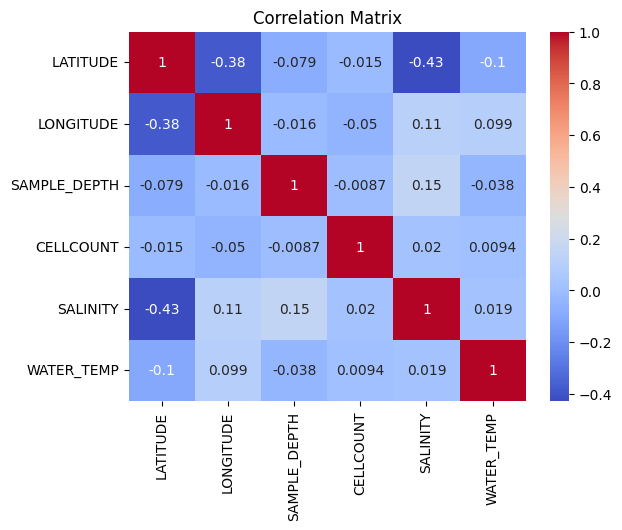

In [ ]:
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [ ]:
# Select non-numeric columns from df_cleaned
non_numeric_df = df_cleaned.select_dtypes(include=['object'])

# Concatenate standardized numerical data with non-numeric data
encoded_df = pd.concat([standardized_df, non_numeric_df.reset_index(drop=True)], axis=1)
encoded_df = pd.get_dummies(encoded_df, columns=['STATE_ID', 'CATEGORY'], drop_first=True)



print(encoded_df.head())

   LATITUDE  LONGITUDE  SAMPLE_DEPTH  CELLCOUNT  SALINITY  WATER_TEMP  \
0  1.115587   1.441656     -0.248581  -0.045283  0.792703    0.244183   
1  0.666464   1.435300     -0.248581  -0.045283  0.792703    0.244183   
2 -0.698959   1.293989     -0.248581  -0.044243  0.792703    0.244183   
3 -0.691169   1.249838      4.199726  -0.045283  0.792703    0.540466   
4 -0.691169   1.249838     -0.248581  -0.045283  0.492815    0.441705   

                        DESCRIPTION SAMPLE_DATE SAMPLE_TIME    GENUS SPECIES  \
0                 off Daytona Beach  1980/12/11       13:05  Karenia  brevis   
1                off Cape Canaveral  1980/12/11       13:25  Karenia  brevis   
2        West Palm Beach; 16 mi off  1977/11/28       13:45  Karenia  brevis   
3  Palm Beach; East to 100 fm depth  1981/10/06         NaN  Karenia  brevis   
4  Palm Beach; East to 100 fm depth  1981/10/06         NaN  Karenia  brevis   

  CELLCOUNT_UNIT  STATE_ID_FL  STATE_ID_MS  STATE_ID_TX  CATEGORY_low  \
0      

# Feature Analysis

In [ ]:
from sklearn.model_selection import train_test_split
y = encoded_df['CELLCOUNT']
X = encoded_df.drop(['CELLCOUNT', 'CATEGORY_low', 'CATEGORY_medium', 'CATEGORY_not observed', 'CATEGORY_very low'], axis=1)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Data Visualization

In [ ]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train, y_train)

ValueError: could not convert string to float: 'Bay Dock (Sarasota Bay)'